In [2]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import io

vec_log_file = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQL-0.05-64/I 140000 U 0 S 200 Y 0.05 Q 0 m vector E 64 B 64 P 4096 T 4/workload.log"
skip_log_file = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQL-0.05-64/I 140000 U 0 S 200 Y 0.05 Q 0 m skiplist E 64 B 64 P 4096 T 4/workload.log"
# hash_skip_list_file_0_100000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQL-0.05-64/I 140000 U 0 S 200 Y 0.05 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l 0 bucket_count 100000/workload.log"
# hash_link_list_file_0_100000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQL-0.05-64/I 140000 U 0 S 200 Y 0.05 Q 0 m hashlinklist E 64 B 64 P 4096 T 4 l 0 bucket_count 100000/workload.log"
# hash_skip_list_file_10_1 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQL-0.05-64/I 140000 U 0 S 200 Y 0.05 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l 10 bucket_count 1/workload.log"
# hash_link_list_file_10_1 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQL-0.05-64/I 140000 U 0 S 200 Y 0.05 Q 0 m hashlinklist E 64 B 64 P 4096 T 4 l 10 bucket_count 1/workload.log"
hash_skip_list_file_6_100000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQL-0.05-64/I 140000 U 0 S 200 Y 0.05 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l 6 bucket_count 10000/workload.log"
hash_link_list_file_6_100000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQL-0.05-64/I 140000 U 0 S 200 Y 0.05 Q 0 m hashlinklist E 64 B 64 P 4096 T 4 l 6 bucket_count 10000/workload.log"
# hash_skip_list_file_2_10000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQL-0.05-64/I 140000 U 0 S 200 Y 0.05 Q 0 m hashskiplist E 64 B 64 P 4096 T 4 l 2 bucket_count 10000/workload.log"
# hash_link_list_file_2_10000 = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-RQL-0.05-64/I 140000 U 0 S 200 Y 0.05 Q 0 m hashlinklist E 64 B 64 P 4096 T 4 l 2 bucket_count 10000/workload.log"


hash_skip_lines_0_100000 = list()
hash_link_lines_0_100000 = list()
hash_skip_lines_10_1 = list()
hash_link_lines_10_1 = list()
hash_skip_lines_6_100000 = list()
hash_link_lines_6_100000 = list()
hash_skip_lines_2_10000 = list()
hash_link_lines_2_10000 = list()

vec_lines = list()
for line in open(vec_log_file).readlines():
    if "RangeQueryTime: " in line:
        vec_lines.append(line)


# vec_sort_lines = list()
# for line in open(vec_log_file).readlines():
#     if "SortingTime: " in line:
#         vec_sort_lines.append(line)


skip_lines = list()
for line in open(skip_log_file).readlines():
    if "RangeQueryTime: " in line:
        skip_lines.append(line)

# for line in open(hash_skip_list_file_0_100000).readlines():
#     if "RangeQueryTime: " in line:
#         hash_skip_lines_0_100000.append(line)

# hash_skip_lines_hash = list()
# for line in open(hash_skip_list_file).readlines():
#     if "RangeQueryTime: " not in line:
#         hash_skip_lines_hash.append(line)

# for line in open(hash_link_list_file_0_100000).readlines():
#     if "RangeQueryTime: " in line:
#         hash_link_lines_0_100000.append(line)



# for line in open(hash_skip_list_file_10_1).readlines():
#     if "RangeQueryTime: " in line:
#         hash_skip_lines_10_1.append(line)


# for line in open(hash_link_list_file_10_1).readlines():
#     if "RangeQueryTime: " in line:
#         hash_link_lines_10_1.append(line)


for line in open(hash_skip_list_file_6_100000).readlines():
    if "RangeQueryTime: " in line:
        hash_skip_lines_6_100000.append(line)


for line in open(hash_link_list_file_6_100000).readlines():
    if "RangeQueryTime: " in line:
        hash_link_lines_6_100000.append(line)


# for line in open(hash_skip_list_file_2_10000).readlines():
#     if "RangeQueryTime: " in line:
#         hash_skip_lines_2_10000.append(line)


# for line in open(hash_link_list_file_2_10000).readlines():
#     if "RangeQueryTime: " in line:
#         hash_link_lines_2_10000.append(line)




skip_df = pd.read_csv(io.StringIO("\n".join(skip_lines)), names=['TimeTaken'])
vec_df = pd.read_csv(io.StringIO("\n".join(vec_lines)), names=['TimeTaken'])
# vec_sort_time_df = pd.read_csv(io.StringIO("\n".join(vec_sort_lines)), names=['TimeTaken'])
# hash_skip_df_0_100000 = pd.read_csv(io.StringIO("\n".join(hash_skip_lines_0_100000)), names=['TimeTaken'])
# hash_skip_hash_df = pd.read_csv(io.StringIO("\n".join(hash_skip_lines_hash)), names=['TimeTaken'])

# hash_skip_df_10_1 = pd.read_csv(io.StringIO("\n".join(hash_skip_lines_10_1)), names=['TimeTaken'])
hash_skip_df_6_100000 = pd.read_csv(io.StringIO("\n".join(hash_skip_lines_6_100000)), names=['TimeTaken'])
# hash_skip_df_2_10000 = pd.read_csv(io.StringIO("\n".join(hash_skip_lines_2_10000)), names=['TimeTaken'])




# hash_link_df_0_100000 = pd.read_csv(io.StringIO("\n".join(hash_link_lines_0_100000)), names=['TimeTaken'])
# hash_link_df_10_1 = pd.read_csv(io.StringIO("\n".join(hash_link_lines_10_1)), names=['TimeTaken'])
hash_link_df_6_100000 = pd.read_csv(io.StringIO("\n".join(hash_link_lines_6_100000)), names=['TimeTaken'])
# hash_link_df_2_10000 = pd.read_csv(io.StringIO("\n".join(hash_link_lines_2_10000)), names=['TimeTaken'])



vec_df['TimeTaken'] = vec_df['TimeTaken'].apply(lambda x: int(x.split("RangeQueryTime: ")[1]))
# vec_sort_time_df['TimeTaken'] = vec_sort_time_df['TimeTaken'].apply(lambda x: int(x.split("SortingTime: ")[1]))
skip_df['TimeTaken'] = skip_df['TimeTaken'].apply(lambda x: int(x.split("RangeQueryTime: ")[1]))
# hash_skip_hash_df['TimeTaken'] = hash_skip_hash_df['TimeTaken'].apply(lambda x: int(x.split("ComputeHashTime: ")[1]))









# hash_skip_df_0_100000['TimeTaken'] = hash_skip_df_0_100000['TimeTaken'].apply(lambda x: int(x.split("RangeQueryTime: ")[1]))
# hash_link_df_0_100000['TimeTaken'] = hash_link_df_0_100000['TimeTaken'].apply(lambda x: int(x.split("RangeQueryTime: ")[1]))
# hash_skip_df_10_1['TimeTaken'] = hash_skip_df_10_1['TimeTaken'].apply(lambda x: int(x.split("RangeQueryTime: ")[1]))
# hash_link_df_10_1['TimeTaken'] = hash_link_df_10_1['TimeTaken'].apply(lambda x: int(x.split("RangeQueryTime: ")[1]))
hash_skip_df_6_100000['TimeTaken'] = hash_skip_df_6_100000['TimeTaken'].apply(lambda x: int(x.split("RangeQueryTime: ")[1]))
hash_link_df_6_100000['TimeTaken'] = hash_link_df_6_100000['TimeTaken'].apply(lambda x: int(x.split("RangeQueryTime: ")[1]))
# hash_skip_df_2_10000['TimeTaken'] = hash_skip_df_2_10000['TimeTaken'].apply(lambda x: int(x.split("RangeQueryTime: ")[1]))
# hash_link_df_2_10000['TimeTaken'] = hash_link_df_2_10000['TimeTaken'].apply(lambda x: int(x.split("RangeQueryTime: ")[1]))

# vec_df = vec_df.apply(lambda x : x / (10**6))
# skip_df = skip_df.apply(lambda x : x / (10**6))
# # hash_skip_hash_df = hash_skip_hash_df.apply(lambda x : x / (10**6))
# hash_skip_df_0_100000 = hash_skip_df_0_100000.apply(lambda x : x / (10**6))
# hash_link_df_0_100000 = hash_link_df_0_100000.apply(lambda x : x / (10**6))
# hash_skip_df_10_1 = hash_skip_df_10_1.apply(lambda x : x / (10**6))
# hash_link_df_10_1 = hash_link_df_10_1.apply(lambda x : x / (10**6))
# hash_skip_df_6_100000 = hash_skip_df_6_100000.apply(lambda x : x / (10**6))
# hash_link_df_6_100000 = hash_link_df_6_100000.apply(lambda x : x / (10**6))
# hash_skip_df_2_10000 = hash_skip_df_2_10000.apply(lambda x : x / (10**6))
# hash_link_df_2_10000 = hash_link_df_2_10000.apply(lambda x : x / (10**6))


findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not fo

findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Gulasch' not found.
findfont: Font family 'Times' not fo

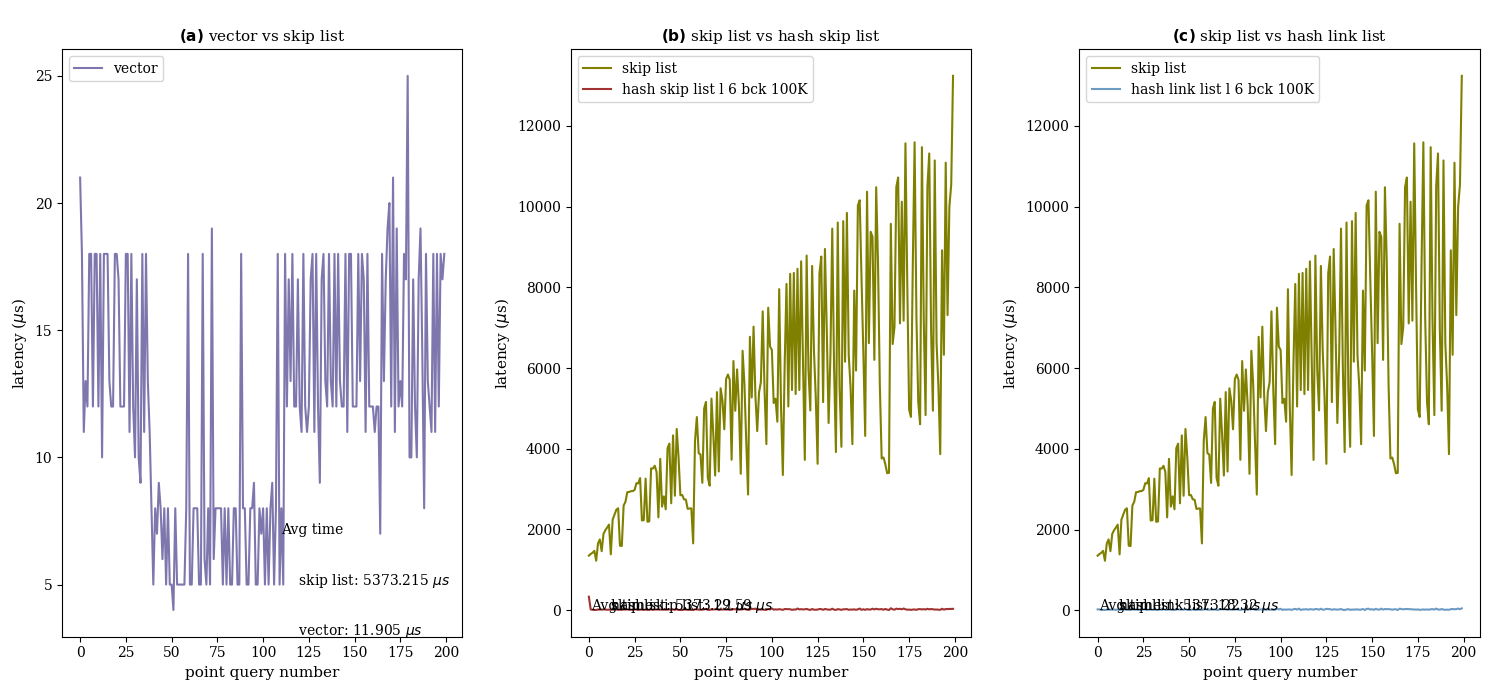

In [4]:
plt.rcParams["font.family"] = "Arial", "Gulasch", "Times", "Times New Roman", "serif"

FIGSIZE = (15, 7)
fig, ax = plt.subplots(1, 3, figsize=FIGSIZE)
# ax[0].plot(skip_df.index, skip_df['TimeTaken'], color='olive', label='skip list')
# ax.plot(vec_sort_time_df.index[:1001], vec_sort_time_df['TimeTaken'][:2001:2].apply(lambda x: x-1000), label='Vector Sort Time')
ax[0].plot(vec_df.index, vec_df['TimeTaken'], alpha=0.7, color='darkslateblue', label='vector')

ax[0].set_title("\n$\mathbf{{(a)}}$ vector vs skip list", fontsize=11)
ax[0].set_xlabel('point query number', fontsize=11)
ax[0].set_ylabel('latency ($\mu$s)', fontsize=11)
# ax[0].set_ylim(bottom=0)
ax[0].legend()
ax[0].annotate(f"Avg time", xy=(110,7))
ax[0].annotate(f"    skip list: {(skip_df).mean()['TimeTaken']:.3f} $\mathit{{\mu}}s$", xy=(110,5))
ax[0].annotate(f"    vector: {(vec_df).mean()['TimeTaken']:.3f} $\mathit{{\mu}}s$", xy=(110,3))



# ax.plot(hash_link_df_0_100000.index, hash_link_df_0_100000['TimeTaken'], alpha=0.4, label='hash Link List l 0 bck 100000')
# ax.plot(hash_link_df_10_1.index, hash_link_df_10_1['TimeTaken'], alpha=0.4, label='hash Link List l 10 bck 1')
# ax.plot(hash_skip_df_6_100000.index, hash_skip_df_6_100000['TimeTaken'], alpha=0.4, label='hash skip List l 6 bck 100000')
# ax.plot(hash_link_df_6_100000.index, hash_link_df_6_100000['TimeTaken'], alpha=0.4, label='hash Link List l 6 bck 100000')
# ax.plot(hash_link_df_2_10000.index, hash_link_df_2_10000['TimeTaken'], alpha=0.4, label='hash Link List l 2 bck 10000')


ax[1].plot(skip_df.index, skip_df['TimeTaken'], color='olive', label='skip list')
ax[1].plot(hash_skip_df_6_100000.index, hash_skip_df_6_100000['TimeTaken'], alpha=0.8, color='darkred', label='hash skip list l 6 bck 100K')

ax[1].set_title("\n$\mathbf{{(b)}}$ skip list vs hash skip list", fontsize=11)
ax[1].set_xlabel(f'point query number', fontsize=11)
ax[1].set_ylabel('latency ($\mu$s)', fontsize=11)
# ax[1].set_ylim(bottom=0, top=15)
ax[1].legend()
ax[1].annotate(f"Avg time", xy=(1,8))
ax[1].annotate(f"    skip list: {skip_df.mean()['TimeTaken']:.2f} $\mathit{{\mu}}s$", xy=(2,7))
ax[1].annotate(f"    hash skip list: {hash_skip_df_6_100000.mean()['TimeTaken']:.2f} $\mathit{{\mu}}s$", xy=(2,6))





ax[2].plot(skip_df.index, skip_df['TimeTaken'], color='olive', label='skip list')
ax[2].plot(hash_link_df_6_100000.index, hash_link_df_6_100000['TimeTaken'], alpha=0.8, color='steelblue', label='hash link list l 6 bck 100K')

ax[2].set_title("\n$\mathbf{{(c)}}$ skip list vs hash link list", fontsize=11)
ax[2].set_xlabel('point query number', fontsize=11)
ax[2].set_ylabel('latency ($\mu$s)', fontsize=11)
# ax[2].set_ylim(bottom=0, top=15)
ax[2].legend()
ax[2].annotate(f"Avg time", xy=(1,9))
ax[2].annotate(f"    skip list: {skip_df.mean()['TimeTaken']:.2f} $\mathit{{\mu}}s$", xy=(2,8))
ax[2].annotate(f"    hash link list: {hash_link_df_6_100000.mean()['TimeTaken']:.2f} $\mathit{{\mu}}s$", xy=(2,7))


# ax.set_ylim(bottom= -0.0001, top=0.0013)
# ax[0].set_xlim(left=0, right=1000)

# ax[1].set_xlim(left=0, right=1000)
# ax[1].set_yscale('log')

# ax[1,0].plot(skip_df.index, skip_df['TimeTaken'], color='olive', label='skip list')
# ax[1,0].plot(hash_skip_df_0_100000.index, hash_skip_df_0_100000['TimeTaken'], alpha=0.8, color='darkred', label='hash skip list l 0 bck 100000')

# ax[1,0].set_title("\n$\mathbf{{(d)}}$ skip list vs hash skip list", fontsize=11)
# ax[1,0].set_xlabel('point query number', fontsize=11)
# ax[1,0].set_ylabel('latency ($\mu$s)', fontsize=11)
# ax[1,0].set_ylim(bottom=0)
# ax[1,0].legend()
# ax[1,0].annotate(f"Avg time", xy=(1,25))
# ax[1,0].annotate(f"    skip list: {(skip_df).mean()['TimeTaken']:.3f} $\mathit{{\mu}}s$", xy=(2,22))
# ax[1,0].annotate(f"    hash skip list: {(hash_skip_df_0_100000).mean()['TimeTaken']:.3f} $\mathit{{\mu}}s$", xy=(2,19))

# ax[1,1].plot(skip_df.index, skip_df['TimeTaken'], color='olive', label='skip list')
# ax[1,1].plot(hash_skip_df_10_1.index, hash_skip_df_10_1['TimeTaken'], alpha=0.8, color='darkred', label='hash skip list l 10 bck 1')

# ax[1,1].set_title("\n$\mathbf{{(e)}}$ skip list vs hash skip list", fontsize=11)
# ax[1,1].set_xlabel(f'point query number', fontsize=11)
# ax[1,1].set_ylabel('latency ($\mu$s)', fontsize=11)
# ax[1,1].set_ylim(bottom=0)
# ax[1,1].legend()
# ax[1,1].annotate(f"Avg time", xy=(1,25))
# ax[1,1].annotate(f"    skip list: {(skip_df).mean()['TimeTaken']:.3f} $\mathit{{\mu}}s$", xy=(2,22))
# ax[1,1].annotate(f"    hash skip list: {(hash_skip_df_0_100000).mean()['TimeTaken']:.3f} $\mathit{{\mu}}s$", xy=(2,19))



# ax[1,2].plot(skip_df.index, skip_df['TimeTaken'], color='olive', label='skip list')
# ax[1,2].plot(hash_skip_df_2_10000.index, hash_skip_df_2_10000['TimeTaken'], alpha=0.8, color='darkred', label='hash skip list l 2 bck 10000')

# ax[1,2].set_title("\n$\mathbf{{(f)}}$ skip list vs hash skip list", fontsize=11)
# ax[1,2].set_xlabel('point query number', fontsize=11)
# ax[1,2].set_ylabel('latency ($\mu$s)', fontsize=11)
# ax[1,2].set_ylim(bottom=0, top=15)
# ax[1,2].legend()
# ax[1,2].annotate(f"Avg time", xy=(1,9))
# ax[1,2].annotate(f"    skip list: {skip_df.mean()['TimeTaken']:.2f} $\mathit{{\mu}}s$", xy=(2,8))
# ax[1,2].annotate(f"    hash link list: {hash_link_df_6_100000.mean()['TimeTaken']:.2f} $\mathit{{\mu}}s$", xy=(2,7))
# # ax[1,2].plot(hash_skip_df_10_1.index, hash_skip_df_10_1['TimeTaken'], alpha=0.8, color='darkred', label='hash skip List l 10 bck 1')

plt.tight_layout()


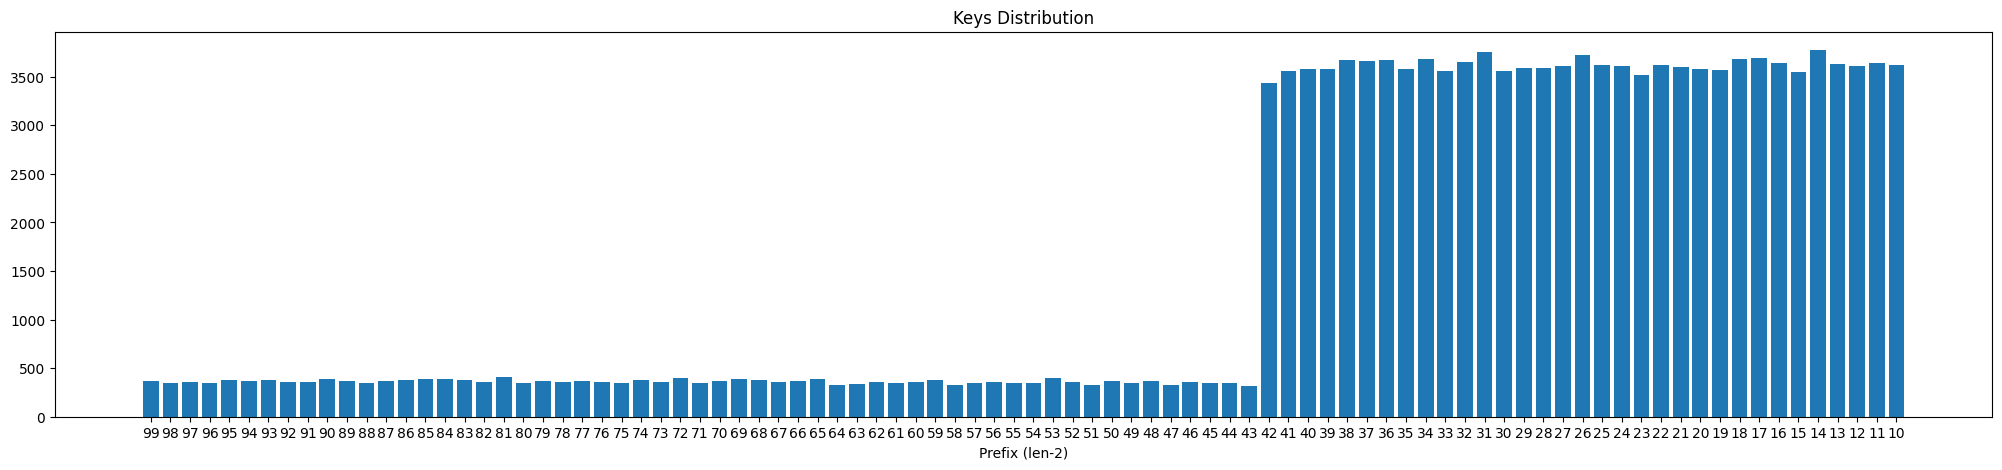

In [10]:
import matplotlib.pyplot as plt

path = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-PQ-TEST-0.05-64/workload.txt"

ff = open(path, "r")

inserts = list()

for line in ff.readlines():
    if "I " in line:
        inserts.append(line.split(' ')[1])

prefix_keys = [x[:2] for x in inserts]

prefix_keys = list(set(prefix_keys))

keys_distribution = dict()

for key in prefix_keys:
    keys_distribution[key] = 0


for key in inserts:
    keys_distribution[key[:2]] += 1

# plot sorted keys distribution

keys_distribution = dict(sorted(keys_distribution.items(), key=lambda item: item[0], reverse=True))

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.bar(keys_distribution.keys(), keys_distribution.values())
ax.set_title("Keys Distribution")
ax.set_xlabel("Prefix (len-2)")

plt.show()

# 30

In [11]:
keys_distribution["30"]

3559

In [1]:

import matplotlib.pyplot as plt

path = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/experiments-PQ-TEST-0.05-64/workload.txt"
prefix_len = 5

ff = open(path, "r")

inserts = list()

for line in ff.readlines():
    if "I " in line:
        inserts.append(line.split(' ')[1])

In [2]:
prefix_keys = [x[:prefix_len] for x in inserts]

prefix_keys = list(set(prefix_keys))

keys_distribution = dict()



In [3]:
for key in prefix_keys:
    keys_distribution[key] = 0




In [4]:
for key in inserts:
    keys_distribution[key[:prefix_len]] += 1



In [5]:
# plot sorted keys distribution

keys_distribution = dict(sorted(keys_distribution.items(), key=lambda item: item[0], reverse=True))


In [9]:
keys_distribution["30149"]

6

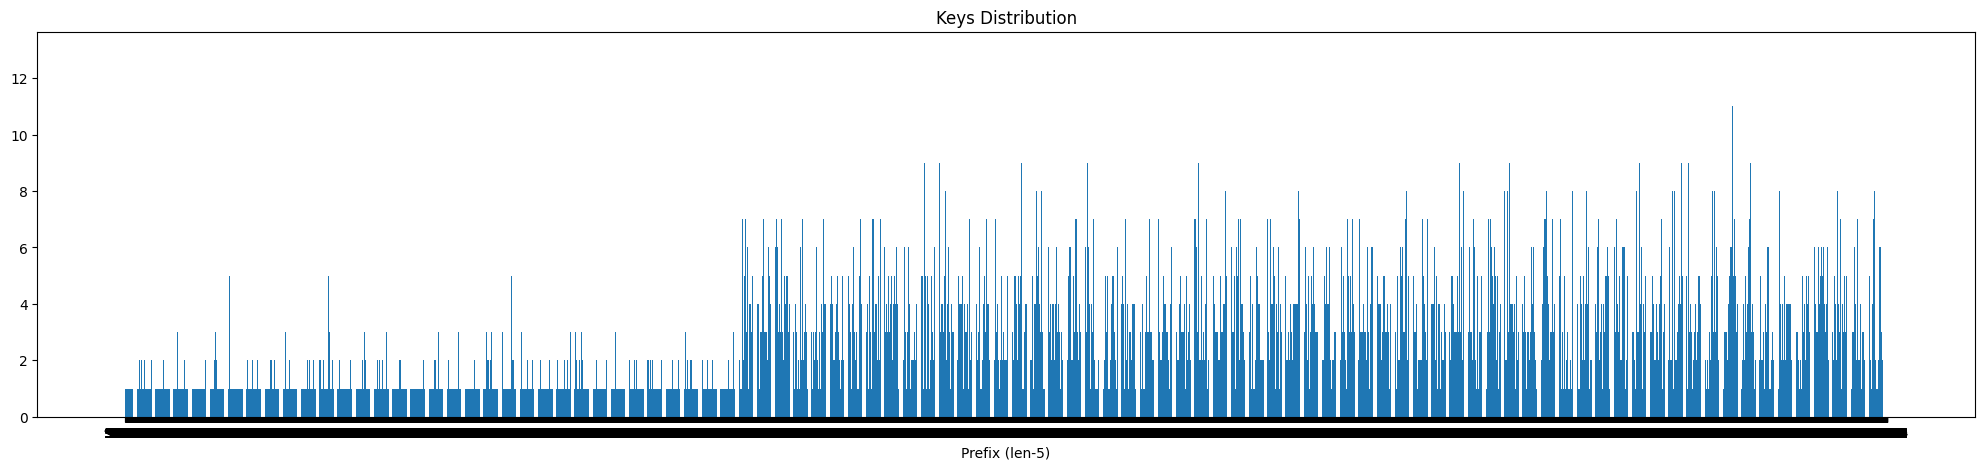

In [6]:

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.bar(keys_distribution.keys(), keys_distribution.values())
ax.set_title("Keys Distribution")
ax.set_xlabel(f"Prefix (len-{prefix_len})")

plt.show()